<a href="https://colab.research.google.com/github/luancsoliver/imersao-dados-desafio-final/blob/main/Notebooks/Analise_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
Na minha análise exploratória eu descobri 2 substâncias que tiveram muita ativação através dos compostos. São elas: nfkb_inhibitor e proteasome_inhibitor. Ambas estão relacionadas com tratamento de câncer por controle de células cancerígenas. Na análise preliminar eu vi que elas diminuem significativamente a viabilidade das células usados no estudo.

Com essa descoberta eu resolvi construir um modelo de Machine Learning para predizer sua ativação e auxiliar as pesquisas farmacológicas na descoberta de drogas eficientes para controle de doenças.

#Importação de pacotes

In [1]:
# para criação dos dataframes e análises dos mesmos
import pandas as pd
import numpy as np
# para plotar gráficos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# para teste T para verificar diferença significativa
from scipy.stats import ttest_ind
# para criação de modelo de machine learning
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Importação de dados e tratamento para as análises

In [2]:
url_dados = 'https://github.com/luancsoliver/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression='zip')

mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

resultados = pd.read_csv('https://github.com/luancsoliver/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')

In [3]:
combinados = pd.merge(dados, resultados[['id','nfkb_inhibitor','proteasome_inhibitor']], on='id')
combinados['c-media'] = combinados.loc[:,'c-0':'c-99'].mean(axis=1)

A apresentação dos data frames, explicação das variáveis, o passo a passo de cada análise e os porquês de ter chegado ao data frame atual estão no notebook de [Análises exploratórias](https://github.com/luancsoliver/imersao-dados-desafio-final/blob/main/Notebooks/Analise_exploratoria.ipynb)

#Como as substâncias afetam a viabilidade das células

Nos gráficos abaixo podemos ver a relação entre a viabilida média das culturas celulares com ou sem a ativação dos inibidores

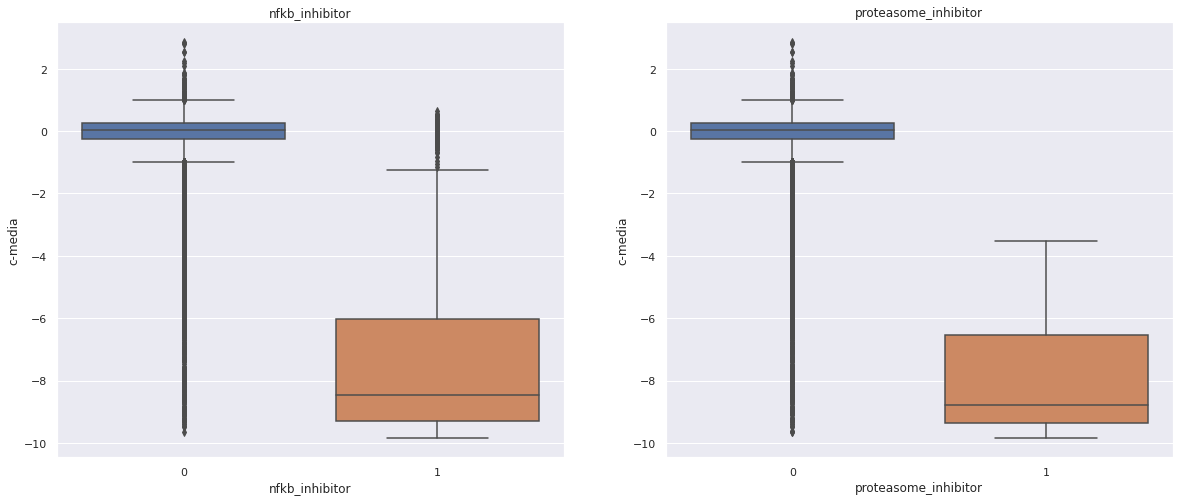

In [4]:
fig, axs = plt.subplots(1,2,figsize=(20,8))


sns.boxplot(data=combinados, y='c-media', x='nfkb_inhibitor', ax=axs[0])
axs[0].set_title('nfkb_inhibitor')

sns.boxplot(data=combinados, y='c-media', x='proteasome_inhibitor', ax=axs[1])
axs[1].set_title('proteasome_inhibitor')

plt.show()


Será que essa diferença visual é confirmada estatísticamente?

In [5]:
print('nfkb_inhibitor')
ttest_ind(combinados.query('nfkb_inhibitor == 0')['c-media'], 
          combinados.query('nfkb_inhibitor == 1')['c-media'])

nfkb_inhibitor


Ttest_indResult(statistic=163.99466301386707, pvalue=0.0)

In [6]:
print('proteasome_inhibitor')
ttest_ind(combinados.query('proteasome_inhibitor == 0')['c-media'], 
          combinados.query('proteasome_inhibitor == 1')['c-media'])

proteasome_inhibitor


Ttest_indResult(statistic=193.08259667912714, pvalue=0.0)

Valor de p<0,05 mostrando que a diferença é significativa para ambos as substâncias.

Isso significa que o efeito que elas causam nas células é significativo. 

Sendo assim é importante que geremos um modelo de ML para prever sua ativação com os dados fornacidos na amostragem.

#Modelo de previsão

Informações mais detalhadas sobre o processo de escolha do modelo e o grau de profundiade da análise estão no Notebook das [Análises exploratórias](https://github.com/luancsoliver/imersao-dados-desafio-final/blob/main/Notebooks/Analise_exploratoria.ipynb)

Eu escolhi o modelo DecisionTreeClassifier porque ele nos dá ótimos resultados, podemos escolher diferentes profundidades de análise e ainda podemos plotar a árvore de decisão que nos informa todo o processo que o computador fez para tomar suas decisões.

Vou fazer um modelo para as duas substâncias e discutirei os resultados.

##Modelo para o Inibidor NF-KB

In [7]:
x = combinados.drop(['id', 'composto', 'nfkb_inhibitor', 'proteasome_inhibitor','c-media'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['nfkb_inhibitor']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)

modelo_arvore = DecisionTreeClassifier(max_depth=7)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.9916019315557422

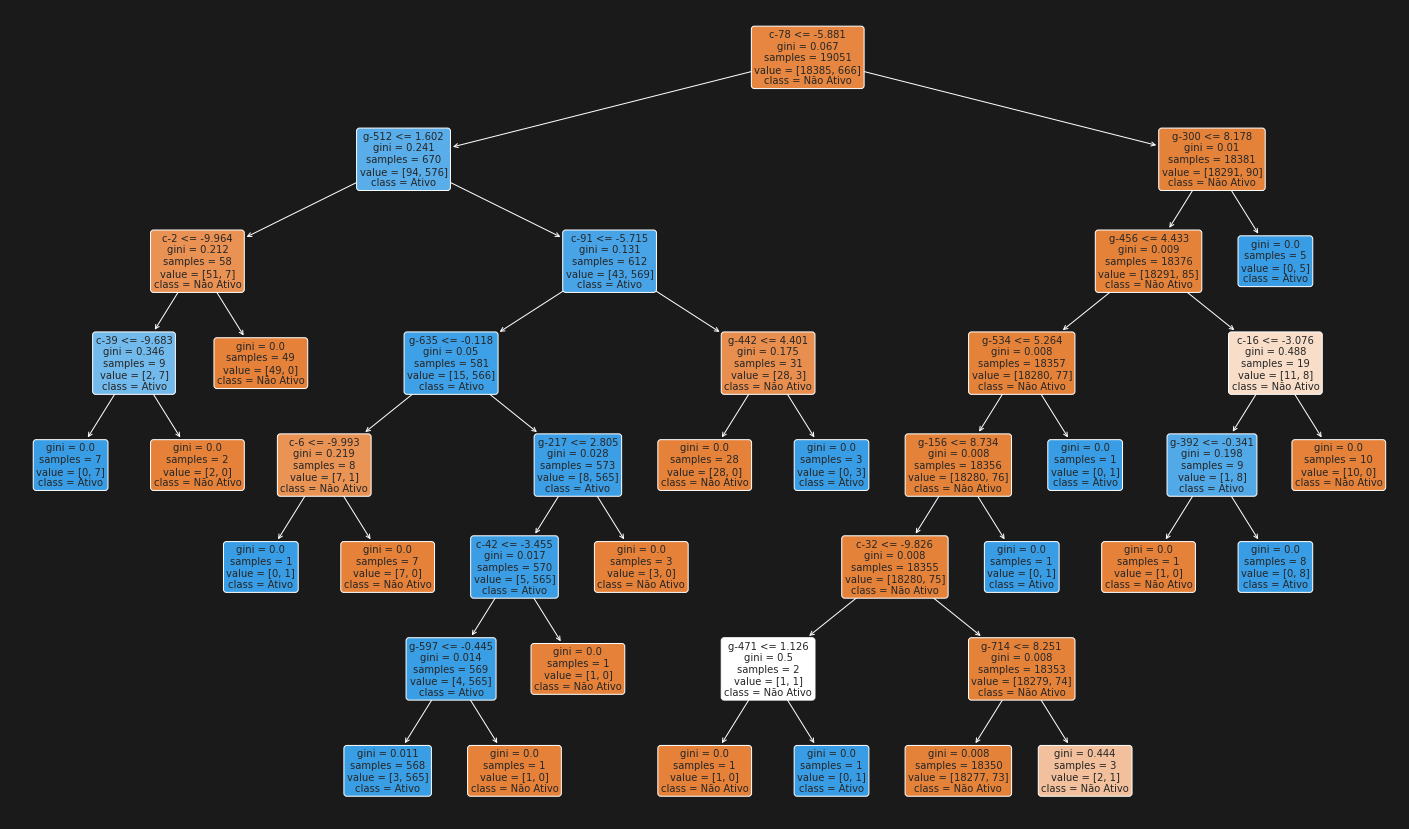

In [8]:
fig, ax = plt.subplots(figsize=(25,15), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativo', 'Ativo'])
plt.show()

Tivemos um score de acertividade de 99,12% sendo um valor bem elevado. O modelo acerta praticamente todas as vezes, tornando-o um modelo excelente para aplicação. Acredito que essa porcentagem alta deve-se ao fato de que os genes e células estão reagindo de forma muito particular à essa substância. Então acaba que é muito mais fácil predizer a reação celular para uma substância em específico do que para todas ao mesmo tempo, pois não tem um padrão de comportamento muito bem definido.

##Modelo para o Inibitor Proteassoma

In [9]:
x = combinados.drop(['id', 'composto', 'nfkb_inhibitor', 'proteasome_inhibitor','c-media'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo'])
y = combinados['proteasome_inhibitor']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=376,
                                                        stratify=y)

modelo_arvore = DecisionTreeClassifier(max_depth=4)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.9947512072223389

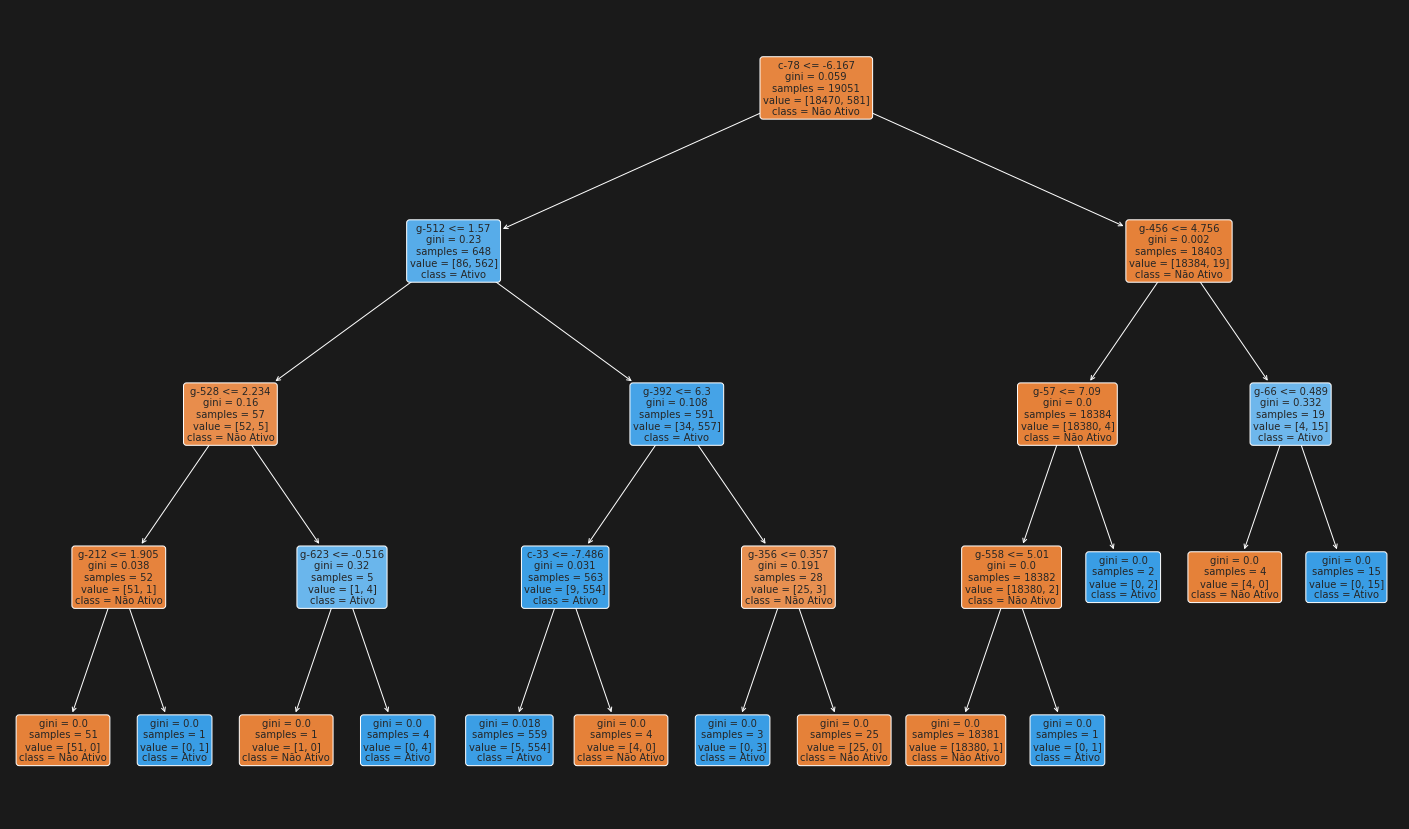

In [10]:
fig, ax = plt.subplots(figsize=(25,15), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativo', 'Ativo'])
plt.show()

Nesse caso a porcentagem foi um pouco maior 99,41% além da profundiade da análise ser menor também. Acredito que isso se deva ao fato dessa substância ter uma influência mais marcante na expressão gênica e viabilidade celular do que o nfkb_inhibitor.

#Composto mais relevante para estes inibidores

Agora vamos ver quais foram os compostos que mais tiveram ativação destes inibidores:

In [14]:
combinados['composto'].value_counts() # primeiro uma contagem dos mais utilizados

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
6fbceecd4       1
f5c443039       1
f19d8c43b       1
b9d3380ee       1
a67f38a69       1
Name: composto, Length: 3289, dtype: int64

In [12]:
# contagem dos compostos com ativação do inibidor NF-KB
combinados.query('nfkb_inhibitor == 1')['composto'].value_counts()

87d714366    718
50e38451f     12
508e74297      7
d2d7e1eab      6
3ee3c4f73      6
786d83020      6
b5e8fd5b5      6
b79576a34      6
0f47f25d6      6
9f9f2cc3e      6
6d4b8a98c      6
838575b1d      6
0fa4c6156      6
f60388237      6
02b14dcc0      6
91dc8bab8      6
b1b429d55      6
ba9f99c9c      6
f344437e0      5
Name: composto, dtype: int64

In [13]:
# contagem dos compostos com ativação do inibidor NF-KB
combinados.query('proteasome_inhibitor == 1')['composto'].value_counts()

87d714366    718
9679541e9      6
161572520      1
379302187      1
Name: composto, dtype: int64

Composto mais importante para ativação destes inibidores e também o composto mais usado no experimento foi 87d714366. Mostrando a importância deste estudo para desenvolvimento de drogas para tratamento de câncer.

#Conclusões

Tivemos altas porcentagem de predição pelos modelos significando que os parâmetros usados foram excelentes para previsão da ativação dos inibidores NF-KB e Proteassoma. 

Ambos tem forte influência na expressão gênica e viabilidade celular o que fez com que o modelo ficasso muito bem ajustado.

A droga mais amostrada no experimento, foi também a mais relevante para esses inibidores.

Através destes modelos as farmacêuticas poderão prever a ativação destes inibidores, adiantando seus resultados no desenvolvimento de drogas para combater o câncer.